# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [93]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient 
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yuwang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [94]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [95]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [96]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 10310


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Alex Wilhelm',
 'title': 'What Square’s smashing earnings tell us about consumer bitcoin demand',
 'description': "Today we're talking Square earnings and its bitcoin base, especially in how it relates to the results of other entities that offer bitcoin sales.",
 'url': 'http://techcrunch.com/2021/05/07/what-squares-smashing-earnings-tell-us-about-consumer-bitcoin-demand/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/05/NSussman_Techcrunch_Exchange_v3-ORNG.jpg?w=533',
 'publishedAt': '2021-05-07T18:17:36Z',
 'content': 'Shares of Square are up more than 6% today after the American fintech company reported a staggering $5.06 billion in revenue in its Q1 2021 earnings report, far ahead of an expected tally of $3.36 bi… [+2045 chars]'}

In [97]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 4150


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'David Riggs',
 'title': 'Radical Ethereum entrepreneurs are redefining what ‘rape kit’ means',
 'description': 'Their investors call them disruptive innovators and detractors. Some call them “dirty scammers.” But the Leda Health co-founders think of themselves as advocates for sexual assault survivors.',
 'url': 'http://techcrunch.com/2021/05/04/radical-ethereum-entrepreneurs-are-redefining-what-rape-kit-means/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/05/created-for-survivors.jpg?w=710',
 'publishedAt': '2021-05-04T14:30:39Z',
 'content': 'Their investors call them disruptive innovators. Detractors like North Carolina Attorney General Josh Stein call them dirty scammers. But Leda Health co-founders Madison Campbell and Liesel Vaidya th… [+8679 chars]'}

In [98]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Compound", "Negative", "Neutral","Positive","text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
3,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
4,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...


In [99]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Compound","Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...
1,0.7506,0.000,0.829,0.171,Cryptocurrency continues to gain mainstream ac...
2,0.0258,0.000,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo..."


In [100]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.144846,0.024210,0.914600,0.061210
std,0.345270,0.043991,0.087194,0.070816
min,-0.680800,0.000000,0.662000,0.000000
25%,0.000000,0.000000,0.855500,0.000000
50%,0.000000,0.000000,0.922000,0.048500
75%,0.366350,0.047250,1.000000,0.098500
max,0.845500,0.219000,1.000000,0.275000


In [101]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,100.000000,100.000000,100.000000,100.000000
mean,0.119302,0.023230,0.923730,0.053050
std,0.348431,0.045068,0.076079,0.064993
min,-0.918600,0.000000,0.694000,0.000000
25%,0.000000,0.000000,0.865750,0.000000
50%,0.000000,0.000000,0.934000,0.036000
75%,0.350450,0.040500,1.000000,0.088000
max,0.827100,0.289000,1.000000,0.256000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score. Because Bitcoin and Ethereum mean positive scores are 0.056220 and 0.048610, respectively.

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score. Because Bitcoin and Ethereum max compound scores are 0.817600 and 0.827100,respectively.

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score. Because Bitcoin and Ethereum max positive scores are 0.269000 and 0.256000, respectively.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [102]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
# YOUR CODE HERE!
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/yuwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [169]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer() 

# Create a list of stopwords
# YOUR CODE HERE!
stop = stopwords.words('english')
# Expand the default stopwords list if necessary
stop.append("'s")
stop.append('char')
stop.append('chars')

stop = set(stop)

In [171]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stopwords
    words = list(filter(lambda t: t.lower() not in stop, words))
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

In [172]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.2960,0.0,0.942,0.058,Shares of Square are up more than 6% today aft...,"[Shares, Square, 6, today, American, fintech, ..."
1,0.0000,0.0,1.000,0.000,Tesla’s relationship with bitcoin is not a dal...,"[Tesla, ’, relationship, bitcoin, dalliance, a..."
2,0.7506,0.0,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[Cryptocurrency, continues, gain, mainstream, ..."
3,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
4,0.0000,0.0,1.000,0.000,Cryptocurrency prices continued to tumble Frid...,"[Cryptocurrency, price, continued, tumble, Fri..."


In [173]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.2144,0.111,0.835,0.054,Their investors call them disruptive innovator...,"[investor, call, disruptive, innovator, Detrac..."
1,0.7506,0.000,0.829,0.171,Cryptocurrency continues to gain mainstream ac...,"[Cryptocurrency, continues, gain, mainstream, ..."
2,0.0258,0.000,0.966,0.034,Venmo is jumping aboard the cryptocurrency ban...,"[Venmo, jumping, aboard, cryptocurrency, bandw..."
3,0.0000,0.000,1.000,0.000,New York (CNN Business)Bitcoin prices continue...,"[New, York, CNN, Business, Bitcoin, price, con..."
4,0.4754,0.000,0.909,0.091,"The creators behind CryptoPunks, one of the mo...","[creator, behind, CryptoPunks, one, popular, N..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [174]:
from collections import Counter
from nltk import ngrams

In [175]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
bitcoin_tokens = [item for sublist in bitcoin_df.tokens.to_list() for item in sublist]
bitcoin_ngrams_counts = Counter(ngrams(bitcoin_tokens, n=2))
bitcoin_ngrams_counts.most_common(10)

[(('Reuters', 'Staff'), 19),
 (('virtual', 'currency'), 15),
 (('illustration', 'taken'), 15),
 (('currency', 'Bitcoin'), 13),
 (('representation', 'virtual'), 12),
 (('seen', 'front'), 12),
 (('front', 'stock'), 12),
 (('stock', 'graph'), 12),
 (('graph', 'illustration'), 12),
 (('2021', 'REUTERS/Dado'), 12)]

In [176]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
ethereum_tokens = [item for sublist in ethereum_df.tokens.to_list() for item in sublist]
ethereum_ngrams_counts = Counter(ngrams(ethereum_tokens, n=2))
ethereum_ngrams_counts.most_common(10)

[(('virtual', 'currency'), 12),
 (('illustration', 'taken'), 12),
 (('representation', 'virtual'), 10),
 (('seen', 'front'), 10),
 (('front', 'stock'), 10),
 (('stock', 'graph'), 10),
 (('graph', 'illustration'), 10),
 (('2021', 'REUTERS/Dado'), 10),
 (('Reuters', 'Staff'), 9),
 (('digital', 'currency'), 9)]

In [177]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [178]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
token_count(bitcoin_tokens)

[('Bitcoin', 59),
 ('Reuters', 42),
 ('bitcoin', 28),
 ('cryptocurrency', 24),
 ('seen', 22),
 ('2021', 21),
 ('currency', 21),
 ('stock', 20),
 ('Staff', 19),
 ('April', 18)]

In [180]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
token_count(ethereum_tokens)

[('Bitcoin', 31),
 ('Ethereum', 28),
 ('Reuters', 26),
 ('currency', 26),
 ('cryptocurrency', 23),
 ('2021', 21),
 ('April', 20),
 ('digital', 19),
 ('high', 14),
 ('taken', 13)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

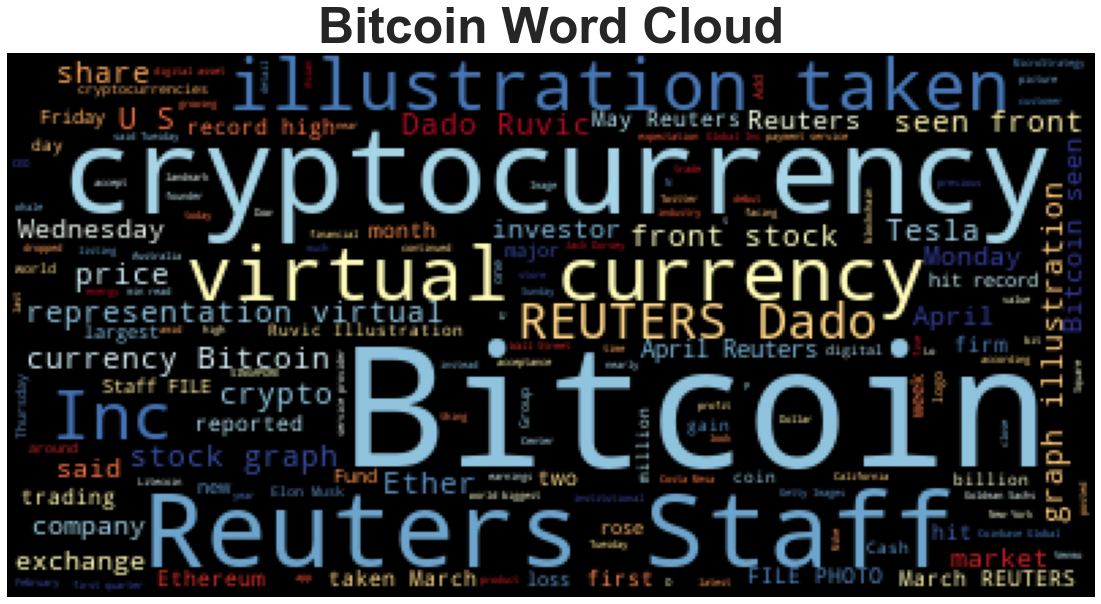

In [182]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(bitcoin_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()


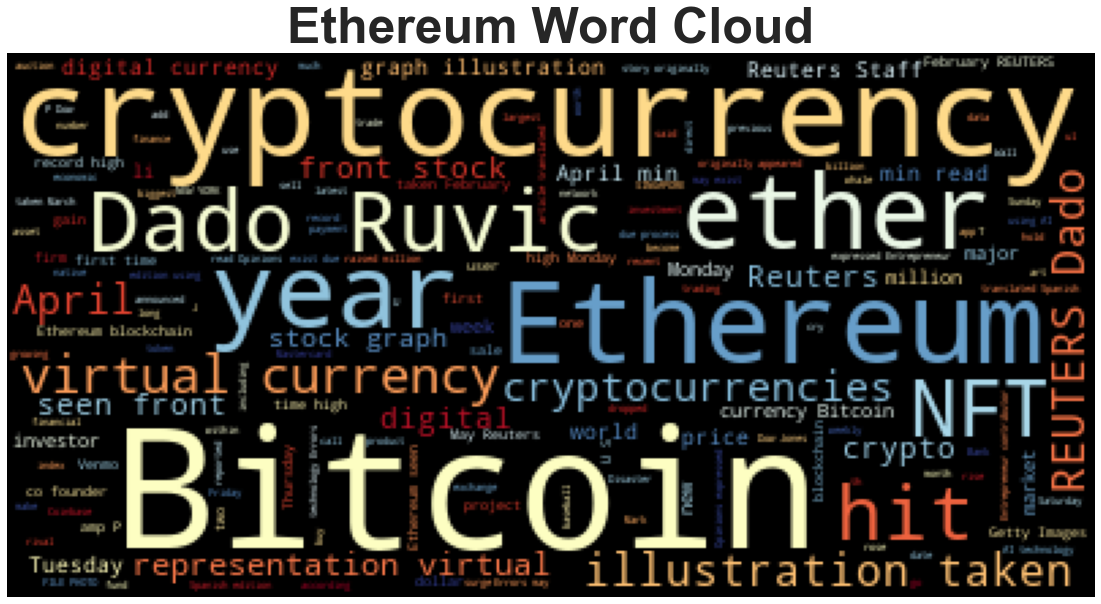

In [183]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(ethereum_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()


---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [184]:
import spacy
from spacy import displacy

In [185]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [186]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [187]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
concat_btc_text = " ".join(bitcoin_df.text.to_list())
#print(concat_btc_text)

In [188]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(concat_btc_text)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data["title"] = "Bitcoin NER"

In [189]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(btc_doc,style='ent')

In [190]:
# List all Entities
# YOUR CODE HERE!

for ent in btc_doc.ents:
    print(ent.text, ent.label_)

more than 6% PERCENT
today DATE
American NORP
$5.06 billion MONEY
2021 DATE
3.36 MONEY
CFO ORG
Zach Kirkhorn PERSON
Monday DATE
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
a momentous year DATE
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 MONEY
first ORDINAL
early March DATE
Bitcoin PERSON
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Bitcoin PERSON
Musk PERSON
Tesla PERSON
Tesla PERSON
first quarter DATE
$438m MONEY
315 MONEY
Bitcoin ORG
] Earth Day EVENT
Jack Dorsey PERSON
Three years DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
Reuters ORG
Reuters ORG
Inc PERSON
Monday DATE
two CARDINAL
Crusoe Energy ORG
two CARDINAL
today DATE
Elon Musk PERSON
Dogecoin GPE
Twitter PRODUCT
Dogecoin GPE
Reuters ORG
April 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PRODUCT
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coi

---

### Ethereum NER

In [191]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
concat_eth_text = " ".join(ethereum_df.text.to_list())
#print(concat_eth_text)

In [192]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(concat_eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data["title"] = "Ethereum NER"

In [193]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc,style='ent')

In [194]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Madison Campbell PERSON
Liesel Vaidya PERSON
PayPal ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Litecoin PERSON
Venmo PERSON
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
Four CARDINAL
New York GPE
CNN ORG
Saturday DATE
about 6% PERCENT
nearly $58,000 MONEY
CryptoPunks ORG
one CARDINAL
NFT ORG
Meebits PRODUCT
20,000 CARDINAL
3D ORG
ConsenSys ORG
Ethereum ORG
$65 million MONEY
J.P. Morgan PERSON
Mastercard PERSON
UBS AG ORG
Reuters ORG
February 19, 2021 DATE
SINGAPORE GPE
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Dfinity ORG
July 2018 DATE
Swiss NORP
Dominic Williams PERSON
StockMarketUS Stock Futures Edge Higher ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
Cryptocurrencies ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Dow Jones Indices ORG
February 19, 2021 DATE
Dado Ruvic/IllustrationCryptocurrency PERSON
Reuters ORG
SINGAPORE GPE
May 3 DATE
Reuters ORG
Mo

---